<a href="https://colab.research.google.com/github/ravi-prakash1907/Data-Structures-and-Algo/blob/main/Submissions/Group%20Projects/Project3/English_Sentence_Generator_by_Ravi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 3** (DSA)

## English Sentence Builder
A Netural Language Processing Project Using Tree Data Structures  

---

### **Objective**  

_“Read any **50 sentance** written in English, and rearrange the words in those sentences until **at least 5 new meaningful sentences** are formed. From the generated new sentences, it should be also possible to reconstruct the original sentences. It is also required to efficiently store the 50 sentences for easy access with minimal memory usage._  
_"It's required to use **tree data structure** to implement this.”_

---  

**([_Detailed Report (PDF) Here!!_](https://github.com/ravi-prakash1907/Data-Structures-and-Algo/raw/main/Submissions/Group%20Projects/Project3/Sentence%20Generator%20%28DSA%29.pdf))**

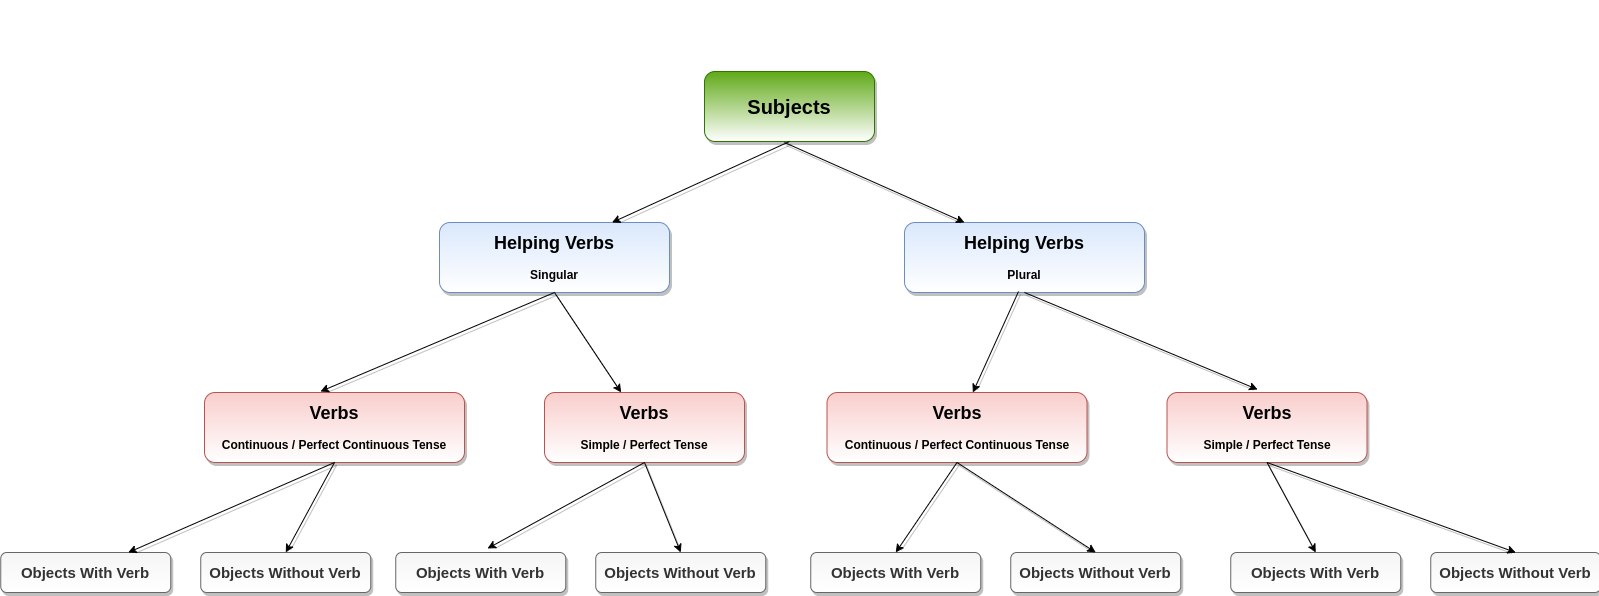


## _Libraries_

In [ ]:
import re
from random import randint

## for formatted output
from IPython.display import clear_output

### Processing Steps

Expend to Read about the Process

**Steps:**  
1. Get Sentence (Input)  
2. Convert to Lower/Upper Case  
3. Resolve for Abbriviation 
6. Remove Stopping Symbol (. ! : ; etc..)
7. Split into multiple sentences on Conjunctions
8. Split the Sentence in following 4-parts:  
    a) Subject  
    b) Helping Verb  
    c) Verb  
    d) Object  

#### Processing Level 1

1. Taking Input  
2. Converting to Lower Case  
3. Resolving for Abbriviation  
4. Remove Stopping/Ending Symbol (. ! ? : ; etc..)  


#### Processing Level 2

_Split mutiple sentences on Conjunctions:_  
  - That  
  - But  
  - While  
  - Meanwhile  
  - Still
  - Before  

_Remove Interjections:_  
  - oh!  
  - yess!!  
  etc..  
  

#### Processing Level 3

**Splitting**  

* Based on the **tense** and **negation**   

Splitted form be like:  
* ```['sub', 'HV', 'verb', 'obj']```
* ```['sub', 'HV', '', 'obj']```
* ```['sub', '', 'Verb', 'obj']```
* ```['sub', '', 'Verb', '']```


## Sentence to List Conversing:

```['Sun'  +  'H.V.'  +  'Verb'  +  'Obj']```




In [ ]:
class sentenceSplitter:
  def __init__(self):
    ## global variables for class
    self.__articles = ['a', 'an', 'the', 'my']
    self.__pluralPronouns = ['some', 'any', 'these', 'their', 'our', 'those', 'them', 'they', 'you', 'i', 'we']
    self.__singlelPronouns = ['he', 'she','his', 'her', 'my', 'this', 'that', 'it']
    self.__conjunctions = ['that', 'but', 'while', 'meanwhile', 'still', 'before']
    self.__allHelpingVerbs = ['is', 'am', 'are', 'was', 'were', 'shall', 'will', 'should', 'would', 'might', 'could', 'have', 'has', 'had', 'can', 'may' 'must', 'did', 'do', 'does']
   
    self.__firstPriority = self.__allHelpingVerbs[:5]
    self.__secondPriority = self.__allHelpingVerbs[5:11]
    self.__thirdPriority = self.__allHelpingVerbs[11:14]
    self.__forthPriority = self.__allHelpingVerbs[14:]

  ###########################
  ###   Private Methods   ###
  ###########################

  ## returns elements of 'allWords' that are in 'findIn'
  def __hasWordsFrom(self, allWords, findIn):
    found = []
    for searched in allWords:
      if searched in findIn:
        found.append(searched)
    if len(found) > 0:
      return found
    return False

  ## remove unnecessary space in beg or end of string and emptyStrings too
  def __removeBlanks(self, wordGroup):
    for wordIndex in range(len(wordGroup)):
      if wordGroup[wordIndex] == '':
        continue
      while wordGroup[wordIndex][0] == " ":
        wordGroup[wordIndex] = wordGroup[wordIndex][1:]
      while wordGroup[wordIndex][-1] == " ":
        wordGroup[wordIndex] = wordGroup[wordIndex][:-1]
    return wordGroup

  ###########################

  ### Processing Level 4 ###
  """
  present/past continuous tense and statement
  """  
  def __commonPresentPast(self, sentence, hVerb): # 'he is boy' + pContinuous
    Subject = Object = Verb = ''
    wordWise = sentence.split(" ")
    negation = False
    wordWise = sentence.split(" ")
    if wordWise[wordWise.index(hVerb)+1] == 'not':
      negation = True
      wordWise.remove('not')
    
    indexOfHVNext = wordWise.index(hVerb)+1
    Subject = " ".join(wordWise[:indexOfHVNext-1])
    if wordWise[indexOfHVNext][-3:] == 'ing':
      Verb = wordWise[indexOfHVNext]
      if indexOfHVNext < len(wordWise):
        Object = " ".join(wordWise[indexOfHVNext+1:])
    else:
      if indexOfHVNext < len(wordWise):
        Object = " ".join(wordWise[indexOfHVNext:])
    
    if negation:
      hVerb += ' not'      
    return [Subject, hVerb, Verb, Object]

  """
  present/past perfect/perfect-continuous tense
  """  
  def __perfectPresentPast(self, sentence, hVerb):
    Subject = Object = Verb = ''
    wordWise = sentence.split(" ")
    negation = False
    wordWise = sentence.split(" ")
    if wordWise[wordWise.index(hVerb)+1] == 'not':
      negation = True
      wordWise.remove('not')


    gotHV = self.__hasWordsFrom(['been'], wordWise)
    if gotHV:
      indexOfHVNext = wordWise.index('been')+1
      indexOfSubNext = wordWise.index(hVerb)
      hVerb += " been"

      if wordWise[indexOfHVNext][-3:] == 'ing':
        Subject = " ".join(wordWise[:indexOfSubNext])
        Verb = wordWise[indexOfHVNext]
        if indexOfHVNext < len(wordWise):
          Object = " ".join(wordWise[indexOfHVNext+1:])
    else:
      indexOfHVNext = wordWise.index(hVerb)+1
      Subject = " ".join(wordWise[:indexOfHVNext-1])
      if indexOfHVNext <= len(wordWise):
        Verb = wordWise[indexOfHVNext]
        if indexOfHVNext < len(wordWise):
          Object = " ".join(wordWise[indexOfHVNext+1:])
    
    if negation:
      hVerb += ' not'
    return [Subject, hVerb, Verb, Object]      

  """
  future tense and statement
  """  
  def __futureTense(self, sentence, hVerb):
    Subject = Object = Verb = ''
    wordWise = sentence.split(" ")
    negation = False
    wordWise = sentence.split(" ")
    if wordWise[wordWise.index(hVerb)+1] == 'not':
      negation = True
      wordWise.remove('not')


    if self.__hasWordsFrom(['have'], wordWise):
      gotHV = self.__hasWordsFrom(['been'], wordWise)
      if gotHV:
        indexOfHVNext = wordWise.index('been')+1
        indexOfSubNext = wordWise.index(hVerb)
        hVerb += " have been"

        if wordWise[indexOfHVNext][-3:] == 'ing':
          Subject = " ".join(wordWise[:indexOfSubNext])
          Verb = wordWise[indexOfHVNext]
          if indexOfHVNext < len(wordWise):
            Object = " ".join(wordWise[indexOfHVNext+1:]) 
      else:
        indexOfHVNext = wordWise.index('have')+1
        indexOfSubNext = wordWise.index(hVerb)
        hVerb += " have"
        
        Subject = " ".join(wordWise[:indexOfSubNext])
        Verb = wordWise[indexOfHVNext]
        if indexOfHVNext < len(wordWise):
          Object = " ".join(wordWise[indexOfHVNext+1:])  
    else:
      gotHV = self.__hasWordsFrom(['be'], wordWise)
      if gotHV:
        indexOfHVNext = wordWise.index('be')+1
        indexOfSubNext = wordWise.index(hVerb)
        hVerb += " be"
        indexOfHVNext = wordWise.index('be')+1
        if wordWise[indexOfHVNext][-3:] == 'ing':
          Subject = " ".join(wordWise[:indexOfSubNext])
          Verb = wordWise[indexOfHVNext]
          if indexOfHVNext < len(wordWise):
            Object = " ".join(wordWise[indexOfHVNext+1:])
      else:
        indexOfHVNext = wordWise.index(hVerb)+1
        Subject = " ".join(wordWise[:wordWise.index(hVerb)])
        Verb = wordWise[indexOfHVNext]
        if indexOfHVNext < len(wordWise):
          Object = " ".join(wordWise[indexOfHVNext+1:])
    
    if negation:
      hVerb += ' not'    
    return [Subject, hVerb, Verb, Object]

  """
  some other continuous tense and guessing statement
  """  
  def __someContinuousPlus(self, sentence, hVerb):
    Subject = Object = Verb = ''
    wordWise = sentence.split(" ")
    negation = False
    wordWise = sentence.split(" ")
    if wordWise[wordWise.index(hVerb)+1] == 'not':
      negation = True
      wordWise.remove('not')


    gotHV = self.__hasWordsFrom(['be'], wordWise)
    if gotHV:
      indexOfHVNext = wordWise.index('be')+1
      indexOfSubNext = wordWise.index(hVerb)
      hVerb += " be"

      indexOfHVNext = wordWise.index('be')+1
      if wordWise[indexOfHVNext][-3:] == 'ing':
        Subject = " ".join(wordWise[:indexOfSubNext])
        Verb = wordWise[indexOfHVNext]
        if indexOfHVNext < len(wordWise):
          Object = " ".join(wordWise[indexOfHVNext+1:]) 
    else:
      indexOfHVNext = wordWise.index(hVerb)+1
      Subject = " ".join(wordWise[:wordWise.index(hVerb)])
      Verb = wordWise[indexOfHVNext]
      if indexOfHVNext < len(wordWise):
        Object = " ".join(wordWise[indexOfHVNext+1:])
    
    if negation:
      hVerb += ' not'    
    return [Subject, hVerb, Verb, Object]


  ### Processing Level 5 ###
  """
  **Initial Splitting** (without Helping Verb)

  * ```['sub', 'verb', 'obj']```
  * ```['sub', 'obj']````
  """
  ###   Finishing Level 5
  def __splitSimple(self, sentence = 'the cow grazes the grass'):
    wordList = sentence.split(" ")
    totalWords = len(wordList)
    Subject = Verb = Object = ''

    if totalWords <= 2:
      Subject = wordList[0]
      if (Subject in self.__singlelPronouns) and (wordList[1][-1] == 's' and wordList[1][-2:] not in ['us', 'os', 'ss', 'is', 'as']):
        Verb = wordList[1]
      else:
        Object = wordList[1]
    else:
      # checking for Simple Past
      if sentence[-2:] == 'ed' or 'ed ' in sentence:
        for word in wordList:
          if 'ed' in word or 'ed ' in word:
            Subject = " ".join(wordList[:wordList.index(word)])
            Verb = word
            Object = " ".join(wordList[wordList.index(word)+1:])
            break
        
      # checking for Simple Present (mainly)
      else:
        sEsEndingWords = []
        for word in wordList:
          if (word[-2:] == 'es') or (word[-1] == 's' and not (word[-2:] == 'us' or word[-2:] == 'ss')):
            sEsEndingWords.append(word)

        usedArticles = self.__hasWordsFrom(self.__articles, wordList)

        # if consisits articles
        if usedArticles:
          if wordList[0] in self.__articles and len(sEsEndingWords) == 1:
            #wordList.remove(wordList[0])
            wordList[0] = " ".join(wordList[:2])
            wordList.remove(wordList[1])
            totalWords -= 1
            subEndIndex = wordList.index(sEsEndingWords[0])
            if sEsEndingWords[0] == wordList[0][len(sEsEndingWords[0]):]:
              Subject = " ".join(wordList[:subEndIndex+1])
              Verb = " ".join(wordList[subEndIndex+1:])    
              Object = " ".join(wordList[wordList.index(Verb)+1:]) 
            else:
              Subject = " ".join(wordList[:subEndIndex])
              Verb = sEsEndingWords[0]
              Object = " ".join(wordList[subEndIndex+1:])
          else:
            objBegIndex = wordList.index(usedArticles[0])
            singleSub = self.__hasWordsFrom(self.__singlelPronouns, wordList)
            if singleSub:
              subEndIndex = wordList.index(singleSub[0]) + 1
              Subject = " ".join(wordList[:subEndIndex])
              Verb = wordList[subEndIndex]
              Object = " ".join(wordList[objBegIndex:])
            else:
              Subject = " ".join(wordList[:objBegIndex-1])
              Verb = wordList[objBegIndex-1]
              Object = " ".join(wordList[objBegIndex:])
        
        else:
          if len(sEsEndingWords) == 0:
            pluralSub = self.__hasWordsFrom(self.__pluralPronouns, wordList)
            if pluralSub:
              subEndIndex = wordList.index(pluralSub[0]) + 1
            elif ' and ' in sentence:
              subEndIndex = wordList.index('and') + 1
            else:
              subEndIndex = 1
            Subject = " ".join(wordList[:subEndIndex])
            Verb = " ".join(wordList[subEndIndex:subEndIndex+1]) 
            Object = " ".join(wordList[subEndIndex+1:]) 
          else:
            if wordList.index(sEsEndingWords[0]) == 0:
              Subject = " ".join(wordList[:1])
              Verb = " ".join(wordList[1:2]) 
              Object = " ".join(wordList[2:]) 
            else:
              singleSub = self.__hasWordsFrom(self.__singlelPronouns, wordList)
              if singleSub:
                subEndIndex = wordList.index(singleSub[0]) + 1
              else:
                subEndIndex = 1
              Subject = " ".join(wordList[:subEndIndex])
              Verb = " ".join(wordList[subEndIndex:subEndIndex+1])
              
              if len(wordList) > subEndIndex+1:
                Object = " ".join(wordList[subEndIndex+1:])

    return [Subject, Verb, Object]


  ## classify sentence as plural/singular   --->  returns True if sentence is singular
  def __hasSinglarForm(self, wordList):
    HVerb = wordList[1]
    if " " in wordList[0]:
      Subject = wordList[0].split(" ")
    else:
      Subject = [wordList[0]]
    Verb = wordList[2]

    # based on the subject
    if self.__hasWordsFrom(self.__singlelPronouns, Subject):
      return True
    if self.__hasWordsFrom(['a', 'an'], Subject):  # Subject[0] in ['a', 'an']
      return True
    # based on the helping verb
    for hv in ['is', 'was', 'has', 'does']:
      if hv in HVerb:
        return True
    for hv in ['am', 'are', 'were', 'have', 'do']:
      if hv in HVerb:
        return False
    for hv in ['had', 'shall', 'will', 'should', 'would', 'might', 'could', 'can', 'may' 'must', 'did']:
      if hv == HVerb:
        # based on the subject
        if self.__hasWordsFrom(self.__pluralPronouns, Subject) or self.__hasWordsFrom(['people', 'crowd'], Subject):
          return False
        # based on the verb
        if Verb[-1:] == 's':
          if Verb[-2:] == 'es':
            if Verb[-3] in ['v', 'i', 's', 'x', 'z'] or Verb[-4:-2] in ['ch', 'sh']:
              return True
            else:
              return False
          else:
            return True
        else:
          return False

    # based on the subject
    if self.__hasWordsFrom(self.__pluralPronouns, Subject) or self.__hasWordsFrom(['people', 'crowd', 'and'], Subject):
      return False
    
    # based on the verb
    if Verb[-1:] == 's':
      if Verb[-2:] == 'es':
        if Verb[-3] in ['v', 'i', 's', 'x', 'z'] or Verb[-4:-2] in ['ch', 'sh']:
          return True
        else:          
          return False
    
    return True
  

  #################################################################
  #################################################################


  ###########################
  ###   Public Methods   ###
  ###########################

  ###########################
  ### Processing Level 1 ###
  """
  1. Resolving Whitespaces and Converting to Lower Case  
  2. Resolving for Abbriviation  
  """
  ###########################

  def initCleaning(self, sentence):
    sentence = re.sub(' +', ' ', sentence)
    sentence = sentence.lower()
    return sentence

  # resolving for abbreviations
  def resolveAbbr(self, sentance):
    splittedSentance = sentance.split(" ")
    
    for wordIndex in range(len(splittedSentance)):
      word = splittedSentance[wordIndex]
      apostrophe = '^.+\'.*$'  # to match apostrophe
      if re.match(apostrophe, word):      
        if re.match('^.+n\'t$', word):
          # for not
          if word == 'can\'t':
            word = 'can not'
          elif word == 'ain\'t':
            word = 'are not'  
          elif word == 'won\'t':
            word = 'will not'
          elif word == 'shan\'t':
            word = 'shall not'
          else:
            word = word[:-3] + " not"
        # for +ing
        elif re.match('^..+in\'$', word):
          word = word[:-1] + 'g'
                
        elif word in ["i'm", "I'm"]:
          word = word[0]+" am"
            
        else: 
          flag = False       
          abbrHVerbs = {'s':'is', 're':'are', 'll':'will', 've':'have', 'd':'had'}
          brokenWord = word.split("'")
          for abbr in list(abbrHVerbs.keys()):
            if abbr == brokenWord[1]:
              brokenWord[1] = abbrHVerbs[abbr]
              flag = True        
            if flag:
              word = " ".join(brokenWord)
              break
            else:
              word = brokenWord[0] + "'" + brokenWord[1]        
              
        splittedSentance[wordIndex] = word
      
    resolvedTense = " ".join(splittedSentance)
    return resolvedTense


  ###########################
  ### Processing Level 2 ###
  """
  1. Remove Stopping/Ending Symbol (. ! : ; etc..)
  """
  ###########################

  def removeStops(self, sentence):
    if not sentence[-1].isalpha() and not sentence[-1].isdigit():
      sentence = self.removeStops(sentence[:-1])
    return sentence


  ###########################
  ### Processing Level 3 ###
  """
  1. Split mutiple sentences on Conjunctions:
    - That, But, While, Meanwhile, Still, Before etc.. 

  2. Remove Interjections:
    - oh!, yess!! etc.. 
  """
  ###########################
    
  ## to remove interjections
  def removeInterjections(self, sentence):
    wordList = sentence.split(" ")
    foundInterjections = []
    for word in wordList:
      if word[-2:] == "!!" or word[-1] == "!":
        foundInterjections.append(word)
    
    # removing found interjections
    for interjection in foundInterjections:
      wordList.remove(interjection)
    
    newSentence = " ".join(wordList)
    return newSentence

  ## to extract only one sentence from grouped form
  def multipleSentences(self, sentence):
    wordList = sentence.split(" ")
    foundConjunctions = self.__hasWordsFrom(self.__conjunctions, wordList)

    if foundConjunctions:
      twoSubSentences = sentence.split(foundConjunctions[0])
      twoSubSentences = self.__removeBlanks(twoSubSentences)
      commonSub = []
      commonSub.extend(self.__articles)
      commonSub.extend(self.__pluralPronouns)
      commonSub.extend(self.__singlelPronouns)
      
      hasDualSentence = False
      for thisSubSentence in twoSubSentences:
        if self.__hasWordsFrom(self.__allHelpingVerbs, thisSubSentence) or self.__hasWordsFrom(commonSub, thisSubSentence):
          hasDualSentence = True
        else:
          hasDualSentence = False
        
      if hasDualSentence:
        return twoSubSentences[0]
      
    return sentence


  ###########################
  ### Processing Level 6 ###
  """
  Splitting based on the type of sentence  

  ```['Subject', 'Helping Verb', 'Verb', 'Object']```
                          OR  
  ```['Subject', '', 'Verb', 'Object']```

  (in some cases, 'Verb' & 'Object' can also be blank)
  """
  ###########################
  def tenseIdentifier(self, sentence = "he goes"):
    splittedForm = ['', '', '', '']
    wordWise = sentence.split(" ")
    gotHV = self.__hasWordsFrom(self.__firstPriority, wordWise)
    if gotHV:
      splittedForm = self.__commonPresentPast(sentence, gotHV[0])              
    
    elif self.__hasWordsFrom(self.__secondPriority, wordWise):
      gotHV = self.__hasWordsFrom(self.__secondPriority, wordWise)
      splittedForm = self.__futureTense(sentence, gotHV[0]) 
    
    elif self.__hasWordsFrom(self.__thirdPriority, wordWise):
      gotHV = self.__hasWordsFrom(self.__thirdPriority, wordWise)
      splittedForm = self.__perfectPresentPast(sentence, gotHV[0])           
    
    elif self.__hasWordsFrom(self.__forthPriority, wordWise):
      gotHV = self.__hasWordsFrom(self.__forthPriority, wordWise)
      splittedForm = self.__someContinuousPlus(sentence, gotHV[0]) 
    
    else:
      HV = ''
      splittedForm = self.__splitSimple(sentence)
      splittedForm.insert(1,HV)
    
    isSingular = self.__hasSinglarForm(splittedForm)
    return splittedForm,isSingular       

     

## Tree-Node

The Implemented tree is a **Binary Tree** that resembles few properties of **BTree** as well. 
 
There are different traversal methods applied as per the requirements.



In [ ]:
class Node:
  def __init__(self):
    self.data = [[],[]]
    self.left = None
    self.right = None
  
  ### to split objects
  def __thisSenList(self, sentence):
    finalList = []
    gotComma = False
    if ',' in sentence:
      gotComma = True

    splitWords = sentence.split(" ")
    commonWords = ['to','of','in', 'the']
    if splitWords[0] in commonWords:
      splitWords[0] = " ".join(splitWords[:2])
      splitWords.remove(splitWords[1])

    if gotComma:
      for word in splitWords:
        if word[-1] == ',':
          commaLoc = splitWords.index(word)
          finalList = [" ".join(splitWords[commaLoc:])]
          if commaLoc <= 2:
            finalList.append(" ".join(splitWords[:commaLoc]))
          else:      
            for i in range(commaLoc):
              finalList.append(splitWords[i])          
          finalList = finalList[::-1]
          break

    elif len(splitWords) > 2:
      for i in range(len(splitWords)):
        finalList.append(splitWords[i])
      begWord = " ".join(finalList[:2])
      finalList.remove(finalList[0])
      finalList.remove(finalList[1])
      finalList.insert(0,begWord)
    else:
      finalList = [sentence]

    return finalList

################################################

  ####    Split Objects
  def splitObj(self, level = 1):
    if level == 4:
      # split left
      newList = []
      if self.left is not None and len(self.left) > 0:
        for word in self.left:
          newList.extend(self.__thisSenList(word))    
        self.left = newList
      # split right
      if self.right is not None and len(self.right) > 0:
        for word in self.right:
          newList.extend(self.__thisSenList(word))    
        self.right = newList

    else:
      if self.left is not None:
        self.left.splitObj(level+1)
      if self.right is not None:
        self.right.splitObj(level+1)

  ####   Possible num of sentences by available data
  def possibleSenCount(self):
    # possible sentences from left sub-tree
    if self.left:
      fromLeft = len(self.data[0]) * self.left.possibleSenCount()
    else:
      fromLeft = len(self.data[0])
    
    # possible sentences from right sub-tree
    if self.right:
      fromRight = len(self.data[1]) * self.right.possibleSenCount()
    else:
      fromRight = len(self.data[1])
    
    return fromLeft+fromRight

  ####   Add data
  def addData(self, partOfSentence, goLeft = False):
    if partOfSentence[0] == '':
      newData = 'NULL'
    else:
      newData = partOfSentence[0]
    
    falseList = ['', 'shall', 'will', 'shall have', 'will have', 'has', 'have', 'had']
    linkToLeft = True
    if goLeft:
      if newData not in self.data[0]:
        self.data[0].append(newData)
      if len(partOfSentence) > 1:
        if partOfSentence[1] in falseList:
          linkToLeft = False
        if self.left is None:
          self.left = Node()
        self.left.addData(partOfSentence[1:], linkToLeft)
    else:
      if newData not in self.data[1]:
        self.data[1].append(newData)
      if len(partOfSentence) > 1:
        if partOfSentence[1] in falseList:
          linkToLeft = False
        if self.right is None:
          self.right = Node()
        self.right.addData(partOfSentence[1:], linkToLeft)
        
    return True
  

  #####  Verify the existance of a sentence
  def varifySentence(self, partOfSentence, goLeft = False):
    if len(partOfSentence) == 0:
      return False
    
    if partOfSentence[0] == '':
      newData = 'NULL'
    else:
      newData = partOfSentence[0]
    
    falseList = ['', 'shall', 'will', 'shall have', 'will have', 'has', 'have', 'had']
    linkToLeft = True
    if goLeft:
      if newData not in self.data[0]:
        return False
      else:
        if len(partOfSentence) > 1:
          if partOfSentence[1] in falseList:
            linkToLeft = False
          return self.left.varifySentence(partOfSentence[1:], linkToLeft)
    else:
      if newData not in self.data[1]:
        return False
      else:
        if len(partOfSentence) > 1:
          if partOfSentence[1] in falseList:
            linkToLeft = False  
          return self.right.varifySentence(partOfSentence[1:], linkToLeft)
        
    return True


  ####   Dynamic Sentence
  def randomWord(self):
    newSentence = []
    leftOrRight = 0
    
    if len(self.data[0]) > 0:
      if len(self.data[1]) > 0:
        leftOrRight = randint(0,1)
        index = randint(0,len(self.data[leftOrRight])-1)
        newSentence.append(self.data[leftOrRight][index])
      else:
        index = randint(0,len(self.data[0])-1)
        newSentence.append(self.data[0][index])
    
    elif len(self.data[1]) > 0:
      index = randint(0,len(self.data[1])-1)
      newSentence.append(self.data[1][index])
    
    if leftOrRight == 0:
      if self.left:
        newSentence.extend(self.left.randomWord())
    else:
      if self.right:
        newSentence.extend(self.right.randomWord())
    
    if newSentence != []:
      return newSentence
    else:
      return ['NONE']

  ##### Printing Complete Tree
  def printNode(self, prec = ""):
    print(prec,"--> (",self.data[0],"  |  ",self.data[1],")\n")
    if self.left:
      self.left.printNode(prec+"\t")
    if self.right:
      self.right.printNode(prec+"\t")
  

## Storing the Sentences in a Tree

It's the main class that actually implements the final solution

In [ ]:
class wordTree:
  def __init__(self):    
    self.thisSplitter = sentenceSplitter() #None
    self.treeRoot = None
    self.hierarchyTree = None

    self.__maxSize = 0   ## maximum number sentences
    self.__currentSize = 0
  

  ###########################
  ###   Private Methods   ###
  ###########################
  def __setMaxSize(self):
    if self.__maxSize == 0:
      count = input("Enter number of sentences that you want to store (min 50): ")
      if count.isnumeric() and int(count) > 50:
          self.__maxSize = int(count)
      else:
        print("Setting limit as minimum = 50")
        self.__maxSize = 50
    
  
  def __updateSize(self):
    self.__currentSize += 1
    return True
  
  def __isInsertionPossible(self):
    if self.__maxSize > self.__currentSize:
      return True
    else:
      return False
  
  ###    Building the tree    ###
  def __buildTree(self):
    if self.treeRoot is None:
      self.treeRoot = Node()  #  root holds SUBJECTS
    return self.treeRoot
  
  def __wordJoiner(self, wordList):
    if len(wordList) > 0:
      theSentence = ""
      for word in wordList:
        if word not in ['NULL', '']:
          theSentence += word+' '
      theSentence = theSentence[0].upper()+theSentence[1:-1]+'.'
    return theSentence

  
  ###########################################
  ###########################################


  def ifTreeExists(self, notify = False):
    if self.__currentSize > 0:
      return True
    if notify:
      print("Try loading some sentences in the tree, first!!\n")
    return False


  ######################################################
  #   ['Subject', 'Helping Verb', 'Verb', 'Object']    #
  ######################################################
  def convertToList(self, textData = "It\'s a sample."):
    aSentence = self.thisSplitter.initCleaning(textData)    
    processedTense = self.thisSplitter.resolveAbbr(aSentence)
    cleanSentence = self.thisSplitter.removeStops(processedTense)

    interjectionRemoval = self.thisSplitter.removeInterjections(cleanSentence)
    extractedSentence = self.thisSplitter.multipleSentences(interjectionRemoval)

    fullSentence,flagSingular = self.thisSplitter.tenseIdentifier(extractedSentence) 

    return fullSentence, flagSingular


  ###########################################
  ###      Storing Sentence in Tree       ###
  ###########################################
  def storeInTree(self, fileName = None):
    self.__setMaxSize()
    root = self.__buildTree()

    if not self.__isInsertionPossible():
      print("Tree is already loaded with the maximum limit!")
      return False
  
    if fileName is None:
      fileName = input("Enter the path to a text (.txt) file: ")
      if fileName[-4:] != ".txt":
        print("Invalid file path! Try next time!")
        return False

    try:
      opened = open(fileName, 'r')
      textData = opened.readlines()
      opened.close()
    except IOError:
      print("Oops!! File does not appear to exist!")
      return False
    
    skipped = 0
    if len(textData) > 0:
      for thisSentence in textData:
        if self.__isInsertionPossible():
          splittedSentence,isSingular = self.convertToList(thisSentence)
          if root.varifySentence(splittedSentence, isSingular):
            skipped += 1
            continue
          if root.addData(splittedSentence, isSingular):
            self.__updateSize()
      
      if len(textData) == skipped:
        print("\nProvided data are already available.\nSkipping the loading process...")
      else:
        toSubtract = min(len(textData), self.__maxSize)
        print("\nTotal sentences in '"+fileName+"' : ",len(textData))
        print("Sentences loaded : ",toSubtract-skipped)
        print("Sentences skipped : ",skipped)
        print("Maximum limit of tree : ",self.__maxSize,"sentences")
        print("\n(Sentences skipped because they can be generated using available data)\n")
        root.splitObj()
      print("Currently, we can generate",root.possibleSenCount(),"UNIQUE sentences!")
      return True
    else:
      print("File is Empty!!\n")
      return False



  ###########################################
  ###      Generating New Sentences       ###
  ###########################################
  def generateSentence(self, count = 5):
    if self.ifTreeExists(notify = True):
      root = self.__buildTree()
      if root.possibleSenCount() < count:
        print("\nCurrently, we can geterate only",root.possibleSenCount(),"unique sentences using availale data!!\nTry next time...")
        return False
      newSen = []
      for i in range(count):
        thisSen = root.randomWord()
        uniqueAttempt = 0  # must be less than 3
        while thisSen in newSen and uniqueAttempt < 3:  # ensures generating unique sentences as much as possible
          thisSen = root.randomWord()
        newSen.append(thisSen)

      counter = 1
      print()    
      for sen in newSen:
        srNum = str(counter)+") "
        if counter < 10:
          srNum = "0"+srNum
        print(srNum,self.__wordJoiner(sen))
        counter += 1
      return True
    return False
    


  ###########################################
  ###      Reconstructing A Sentence      ###
  ###########################################
  def reconstructSentence(self):
    if self.ifTreeExists(notify = True):
      root = self.__buildTree()
      toReconstruct = input("Enter your sentence: ")
      splittedSentence,isSingular = self.convertToList(toReconstruct)
      if root.varifySentence(splittedSentence, isSingular):
        print("Reconstruction is possible!!\n")
      else:
        print("Smart ugh!! You never fed this sentence!\n")
      return True
    return False



  ###########################################
  ###         Printing A Sentence         ###
  ###########################################
  def printTree(self):
    if self.ifTreeExists(notify = True):
      root = self.__buildTree()
      root.printNode()
      print("\n"+("_"*50))
      print("Tree is loaded with",self.__currentSize,"sentences!")
      return True
    return False
  


  ###########################################
  ###     Print the Storage Hierarchy     ###
  ###########################################
  def printHierarchy(self):
    if self.hierarchyTree is None:
      sentenceList = ['Subjects verb object.',
                      'Subjects is object.',
                      'Subjects am object.',
                      'Subjects are object.',
                      'Subjects is verb+ing object.',
                      'Subjects am verb+ing object.',
                      'Subjects are verb+ing object.',
                      'Subjects has verb-3rd-form object.',
                      'Subjects have verb-3rd-form object.',
                      'Subjects has been verb-ing object.',
                      'Subjects have been verb-ing object.',
                      'Subjects verb-2nd-form object.',
                      'Subjects was object.',
                      'Subjects were object.',
                      'Subjects was verb+ing object.',
                      'Subjects were verb+ing object.',
                      'Subjects had verb-3rd-form object.',
                      'Subjects had been verb-ing object.',
                      'Subjects will verb object.',
                      'Subjects shall verb object.',
                      'Subjects will be verb+ing object.',
                      'Subjects shall be verb+ing object.',
                      'Subjects will have verb-3rd-form object.',
                      'Subjects shall have verb-3rd-form object.',
                      'Subjects will have been verb-ing object.',
                      'Subjects shall have been verb-ing object.']
      
      self.hierarchyTree = Node()

      for sentence in sentenceList:
        splittedSentence,isSingular = self.convertToList(sentence)
        self.hierarchyTree.addData(splittedSentence, isSingular)
    
    print("\nViewing Storage Model of This Program: \n"+("_"*50)+"\n")
    self.hierarchyTree.printNode()
    print("\n"+("_"*50))



# **Users' Zone**

_Execute The Program Here_

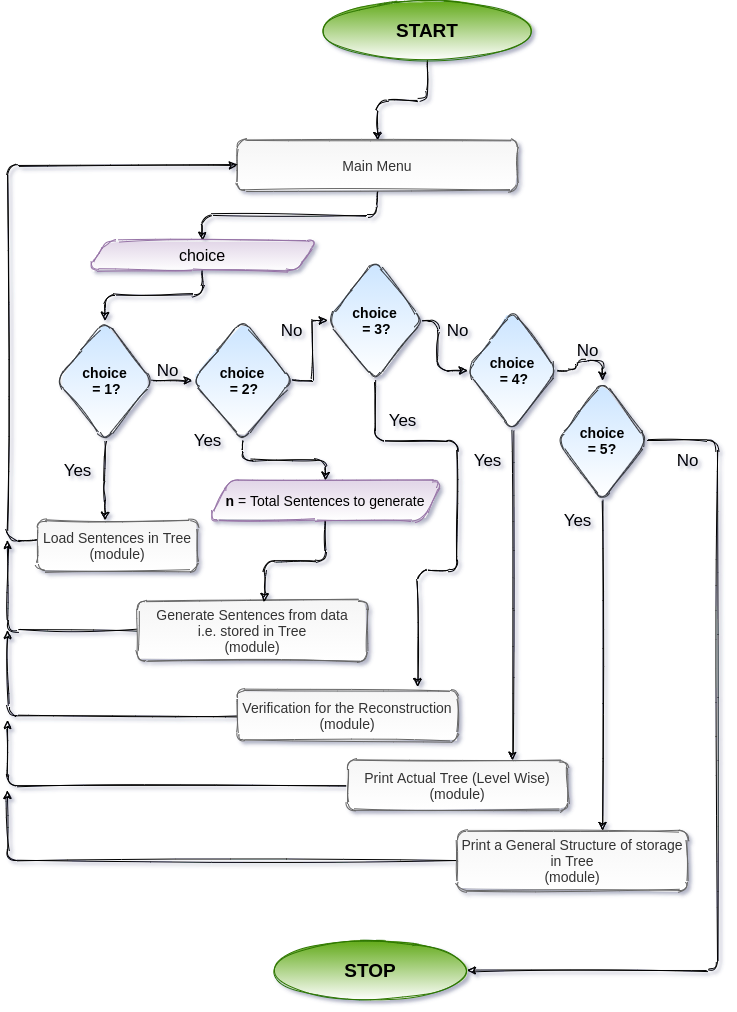

## Main-Menu

In [ ]:
def menu():
  # Printing Menu
  print("\nMain Menu:")
  print("""----------
        \n1. Store Sentences in Tree  \n2. Generate New Sentences \n3. Try Reconstructing a Given Sentence \n4. Print the Tree \n5. View Storage Hierarchy of Tree \n
        \n** Any other key to exit!!\n
        """)
  return input("Enter your choice: ")

## Main-Function


In [ ]:
### Driver Function

if __name__ == "__main__":
  
  ## Showing Menu
  thisTree = wordTree()


  while (True): 
    clear_output()
    choice = menu()
    
    ## Decisions
    if choice == '1':
      # Loading/Storing Sentences in Tree
      clear_output(wait=True)
      thisTree.storeInTree()
      input("\nPress Enter!!")
    
    elif choice == '2':
      # Generating New Sentences
      clear_output(wait=True)
      if thisTree.ifTreeExists(notify = True):
        numOfSen = input("Enter Number of New Sentences (by default 5): ")
        while True:
          if numOfSen.isnumeric() and int(numOfSen) > 0:
            ableToGen = thisTree.generateSentence(int(numOfSen))
          else:
            ableToGen = thisTree.generateSentence()
          if ableToGen and input("\nGenerate once more? (Y/N): ") not in ['y', 'Y']:
            break
          elif not ableToGen:
            input("\n\nPress Enter!!")
            break
          else:
            clear_output(wait=True)
      else:
        input("\n\nPress Enter!!")
    
    elif choice == '3':
      # Reconstructing a Given Sentence
      clear_output(wait=True)
      while True:
        if thisTree.reconstructSentence():
          if input("\nTest for another sentence? (Y/N): ") not in ['y', 'Y']:
            break
          else:
            clear_output(wait=True)
        else:
          input("\n\nPress Enter!!")
          break
    
    elif choice == '4':
      # Printing the Tree
      clear_output(wait=True) 
      thisTree.printTree()
      input("\n\nPress Enter!!")
    
    elif choice == '5':
      # Printing the Storage Model
      clear_output(wait=True) 
      thisTree.printHierarchy()
      input("\n\nPress Enter!!")

    else:
      # Deleting the Object Instance and Exiting
      del(thisTree)
      clear_output()
      print("\nGood Bye!!")
      break



Good Bye!!
